## Relationship between the hallmarks of cancer and liver cancer progression

### Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pickle

### Set variables

In [2]:
data_dir=""
rnaseq_file=data_dir+"lihc_rnaseq.csv.gz"
clinical_file=data_dir+"revised_clinical.tsv"

### Load data

#### RNASeq

In [3]:
rnaseq = (pd.
          read_csv(rnaseq_file,compression="gzip").
          set_index('bcr_patient_barcode').
          applymap(lambda x : int(np.ceil(x)))
         )
display(rnaseq.shape)
display(rnaseq.head())

(423, 20531)

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01A-11R-A37K-07,0,2,4,91,1018,0,142,1,0,0,...,25,274,795,19,500,3173,891,511,4,7
TCGA-2Y-A9GS-01A-12R-A38B-07,0,27,3,72,640,0,123,2,0,0,...,69,633,1154,72,1001,5302,756,861,7,483
TCGA-2Y-A9GT-01A-11R-A38B-07,0,0,5,96,743,0,96,2,1,0,...,47,1220,1134,13,1290,3220,861,524,15,84
TCGA-2Y-A9GU-01A-11R-A38B-07,0,6,6,62,1187,0,281,1,0,0,...,19,286,1151,10,942,3093,1340,344,3,3
TCGA-2Y-A9GV-01A-11R-A38B-07,0,12,6,105,879,0,283,0,0,0,...,42,1000,1632,5,1381,2903,576,666,3,120


In [4]:
gene_name_logical = [len(x[0])>1 for x in rnaseq.columns.str.split('|')]
sub = rnaseq.loc[:,gene_name_logical]
sub.columns = [x[0] for x in sub.columns.str.split('|')]
rnaseq_sub = sub.copy()
rnaseq_sub.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01A-11R-A37K-07,22283,584,0,375,0,286320,81,543,1,1032,...,25,274,795,19,500,3173,891,511,4,7
TCGA-2Y-A9GS-01A-12R-A38B-07,22642,1573,3,99,0,31169,163,2,1,903,...,69,633,1154,72,1001,5302,756,861,7,483
TCGA-2Y-A9GT-01A-11R-A38B-07,77670,1281,0,215,1,19515,119,1,3,773,...,47,1220,1134,13,1290,3220,861,524,15,84
TCGA-2Y-A9GU-01A-11R-A38B-07,9323,1253,0,2914,2,243941,72,0,0,722,...,19,286,1151,10,942,3093,1340,344,3,3
TCGA-2Y-A9GV-01A-11R-A38B-07,84243,1641,0,404,0,8756,83,0,9,828,...,42,1000,1632,5,1381,2903,576,666,3,120


In [5]:
rnaseq_sub.index = rnaseq_sub.index.map(lambda x: '-'.join(x.split('-')[:3]).lower())
print(rnaseq_sub.shape)
rnaseq_sub.head()

(423, 20501)


,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
tcga-2v-a95s,22283,584,0,375,0,286320,81,543,1,1032,...,25,274,795,19,500,3173,891,511,4,7
tcga-2y-a9gs,22642,1573,3,99,0,31169,163,2,1,903,...,69,633,1154,72,1001,5302,756,861,7,483
tcga-2y-a9gt,77670,1281,0,215,1,19515,119,1,3,773,...,47,1220,1134,13,1290,3220,861,524,15,84
tcga-2y-a9gu,9323,1253,0,2914,2,243941,72,0,0,722,...,19,286,1151,10,942,3093,1340,344,3,3
tcga-2y-a9gv,84243,1641,0,404,0,8756,83,0,9,828,...,42,1000,1632,5,1381,2903,576,666,3,120


#### Using only the genes from the hallmarks of cancer

In [6]:
geneset_dict = pickle.load(open('hallmarks_of_cancer_geneset_dictionary.pkl','rb'))

In [7]:
all_hallmark_genes = np.unique(np.concatenate([v for k,v in geneset_dict.items()]))
len(all_hallmark_genes)

4384

In [8]:
rnaseq_sub = rnaseq_sub.loc[:,np.intersect1d(rnaseq_sub.columns.values,all_hallmark_genes)]
print(rnaseq_sub.shape)
rnaseq_sub.head()

(423, 4223)


,A2M,AAAS,AADAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRD1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
tcga-2v-a95s,286320,1032,25,7024,1535,1151,1678,93,109,1219,...,4,489,505,1712,639,0,0,305,464,3173
tcga-2y-a9gs,31169,903,156,8495,11220,1249,1126,74,50,1079,...,3,485,174,1347,348,0,0,677,629,5302
tcga-2y-a9gt,19515,773,479,3542,12577,3133,2186,70,25,2316,...,1,412,141,1564,260,0,0,399,287,3220
tcga-2y-a9gu,243941,722,36,5918,9671,1748,246,452,14,1269,...,1,332,106,626,237,0,0,433,451,3093
tcga-2y-a9gv,8756,828,616,6088,23069,2885,1129,110,39,2132,...,2,347,124,1320,339,0,0,642,100,2903


#### Clinical 

In [9]:
clinical = pd.read_csv(clinical_file, sep='\t')
clinical['submitter_id'] = clinical['submitter_id'].map(lambda x: x.lower())
clinical.head()

,case_id,submitter_id,project_id,gender,year_of_birth,race,days_to_birth,ethnicity,vital_status,days_to_death,...,treatment_effect,initial_disease_status,treatment_type,therapeutic_agents,regimen_or_line_of_therapy,treatment_intent_type,treatment_anatomic_site,treatment_outcome,days_to_treatment_end,treatment_or_therapy
0,bce25281-502e-4599-9679-32dc8462ffb1,tcga-dd-a4ne,TCGA-LIHC,female,1936,white,-27549,hispanic or latino,Dead,660.0,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
1,654af137-70d9-4ee4-9f69-793e352d30f8,tcga-dd-a1ee,TCGA-LIHC,male,1933,white,-26858,not hispanic or latino,Dead,349.0,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
2,45f00f00-d793-4dca-aeb9-7626d4575c90,tcga-gj-a9db,TCGA-LIHC,male,1945,white,-25020,not hispanic or latino,Dead,67.0,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
3,496beef9-80d9-4734-a23d-334ae1b6aaab,tcga-dd-aac8,TCGA-LIHC,male,1936,asian,-26322,not hispanic or latino,Dead,16.0,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
4,d1aa9c1a-d732-48c0-b669-8a14e0397344,tcga-2y-a9gv,TCGA-LIHC,female,1953,white,-20011,not hispanic or latino,Dead,2532.0,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,yes


#### Join RNASeq and Clinical tumor stage - Used for validating similarity between clustering outcomes and actual stages

In [10]:
full_df_stage = pd.merge(rnaseq_sub.reset_index(), clinical[['submitter_id','gender','race','ethnicity','tumor_stage']], left_on='bcr_patient_barcode', right_on='submitter_id', how='inner') \
    .set_index('bcr_patient_barcode') \
    .drop('submitter_id', axis=1)
#ensuring ID uniqueness
full_df_stage.index = [x + '-' + str(i) for i,x in enumerate(full_df_stage.index)]
print(full_df_stage.shape)
full_df_stage.head()

(423, 4227)


,A2M,AAAS,AADAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNRD1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX,gender,race,ethnicity,tumor_stage
tcga-2v-a95s-0,286320,1032,25,7024,1535,1151,1678,93,109,1219,...,639,0,0,305,464,3173,male,asian,not hispanic or latino,stage ii
tcga-2y-a9gs-1,31169,903,156,8495,11220,1249,1126,74,50,1079,...,348,0,0,677,629,5302,male,white,hispanic or latino,not reported
tcga-2y-a9gt-2,19515,773,479,3542,12577,3133,2186,70,25,2316,...,260,0,0,399,287,3220,male,white,not hispanic or latino,stage i
tcga-2y-a9gu-3,243941,722,36,5918,9671,1748,246,452,14,1269,...,237,0,0,433,451,3093,female,white,not hispanic or latino,stage i
tcga-2y-a9gv-4,8756,828,616,6088,23069,2885,1129,110,39,2132,...,339,0,0,642,100,2903,female,white,not hispanic or latino,stage i


In [11]:
# Subset out the recognizable stages
tumor_stages = clinical['tumor_stage'].value_counts()
tumor_stages[tumor_stages.index.str.startswith('stage')]

stage i       175
stage ii       87
stage iiia     65
stage iiib      9
stage iiic      9
stage iii       3
stage ivb       2
stage iv        2
stage iva       1
Name: tumor_stage, dtype: int64

In [12]:
# Subset full dataframe for patient samples that have a corresponding tumor stage
full_df_stage = full_df_stage.loc[full_df_stage['tumor_stage'].str.startswith('stage')]

# Since there are substages (eg, stage iia and stage iib), we will conver them to the 4 main stages
full_df_stage['tumor_stage'] = full_df_stage['tumor_stage'] \
                            .str.replace('a', '') \
                            .str.replace('b', '') \
                            .str.replace('c', '') \
                            .str.replace('v', '') \
                            .str.replace('stge','stage')
df_stage = full_df_stage.reset_index()
df_stage.head()

,index,A2M,AAAS,AADAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNRD1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX,gender,race,ethnicity,tumor_stage
0,tcga-2v-a95s-0,286320,1032,25,7024,1535,1151,1678,93,109,...,639,0,0,305,464,3173,male,asian,not hispanic or latino,stage ii
1,tcga-2y-a9gt-2,19515,773,479,3542,12577,3133,2186,70,25,...,260,0,0,399,287,3220,male,white,not hispanic or latino,stage i
2,tcga-2y-a9gu-3,243941,722,36,5918,9671,1748,246,452,14,...,237,0,0,433,451,3093,female,white,not hispanic or latino,stage i
3,tcga-2y-a9gv-4,8756,828,616,6088,23069,2885,1129,110,39,...,339,0,0,642,100,2903,female,white,not hispanic or latino,stage i
4,tcga-2y-a9gw-5,43813,622,49,4758,7663,1649,2252,96,58,...,361,0,0,351,221,8467,male,white,not hispanic or latino,stage i


### Join RNA Seq data with clinical demographic patient information for Clustering

In [13]:
# Merging demographic information like gender, race, ethnicity with gene expression data 
full_df = pd.merge(rnaseq_sub.reset_index(), clinical[['submitter_id','gender','race','ethnicity']], left_on='bcr_patient_barcode', right_on='submitter_id', how='inner') \
    .set_index('bcr_patient_barcode') \
    .drop('submitter_id', axis=1)
#ensuring ID uniqueness
full_df.index = [x + '-' + str(i) for i,x in enumerate(full_df.index)]
full_df.head()

,A2M,AAAS,AADAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNFX1,ZNRD1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX,gender,race,ethnicity
tcga-2v-a95s-0,286320,1032,25,7024,1535,1151,1678,93,109,1219,...,1712,639,0,0,305,464,3173,male,asian,not hispanic or latino
tcga-2y-a9gs-1,31169,903,156,8495,11220,1249,1126,74,50,1079,...,1347,348,0,0,677,629,5302,male,white,hispanic or latino
tcga-2y-a9gt-2,19515,773,479,3542,12577,3133,2186,70,25,2316,...,1564,260,0,0,399,287,3220,male,white,not hispanic or latino
tcga-2y-a9gu-3,243941,722,36,5918,9671,1748,246,452,14,1269,...,626,237,0,0,433,451,3093,female,white,not hispanic or latino
tcga-2y-a9gv-4,8756,828,616,6088,23069,2885,1129,110,39,2132,...,1320,339,0,0,642,100,2903,female,white,not hispanic or latino


In [14]:
# One hot encoding on full dataframe to convert categorical fields into binary fields
full_df_onehot = pd.get_dummies(full_df, drop_first=False)
full_df_onehot.head()

,A2M,AAAS,AADAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,gender_female,gender_male,race_american indian or alaska native,race_asian,race_black or african american,race_not reported,race_white,ethnicity_hispanic or latino,ethnicity_not hispanic or latino,ethnicity_not reported
tcga-2v-a95s-0,286320,1032,25,7024,1535,1151,1678,93,109,1219,...,0,1,0,1,0,0,0,0,1,0
tcga-2y-a9gs-1,31169,903,156,8495,11220,1249,1126,74,50,1079,...,0,1,0,0,0,0,1,1,0,0
tcga-2y-a9gt-2,19515,773,479,3542,12577,3133,2186,70,25,2316,...,0,1,0,0,0,0,1,0,1,0
tcga-2y-a9gu-3,243941,722,36,5918,9671,1748,246,452,14,1269,...,1,0,0,0,0,0,1,0,1,0
tcga-2y-a9gv-4,8756,828,616,6088,23069,2885,1129,110,39,2132,...,1,0,0,0,0,0,1,0,1,0


In [15]:
# Filtering columns that are not required after one hot encoding 
full_df_onehot_filter = full_df_onehot.drop(['race_not reported','ethnicity_not reported','gender_male'],axis=1)
full_df_onehot_filter.head()

,A2M,AAAS,AADAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZW10,ZWINT,ZYX,gender_female,race_american indian or alaska native,race_asian,race_black or african american,race_white,ethnicity_hispanic or latino,ethnicity_not hispanic or latino
tcga-2v-a95s-0,286320,1032,25,7024,1535,1151,1678,93,109,1219,...,305,464,3173,0,0,1,0,0,0,1
tcga-2y-a9gs-1,31169,903,156,8495,11220,1249,1126,74,50,1079,...,677,629,5302,0,0,0,0,1,1,0
tcga-2y-a9gt-2,19515,773,479,3542,12577,3133,2186,70,25,2316,...,399,287,3220,0,0,0,0,1,0,1
tcga-2y-a9gu-3,243941,722,36,5918,9671,1748,246,452,14,1269,...,433,451,3093,1,0,0,0,1,0,1
tcga-2y-a9gv-4,8756,828,616,6088,23069,2885,1129,110,39,2132,...,642,100,2903,1,0,0,0,1,0,1


In [16]:
# Transforming the data such that the features are within a specific range e.g. [0, 1]. - Feature Scaling  
x = full_df_onehot_filter #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
genome_clinic_df = pd.DataFrame(x_scaled,columns=full_df_onehot_filter\
            .loc[:, full_df_onehot_filter.columns != 'index'].columns)

In [17]:
index_df = full_df_onehot_filter.reset_index()
genome_clinic_std_concat = pd.concat([index_df['index'],genome_clinic_df],axis=1)
genome_clinic_std_concat.head()

,index,A2M,AAAS,AADAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZW10,ZWINT,ZYX,gender_female,race_american indian or alaska native,race_asian,race_black or african american,race_white,ethnicity_hispanic or latino,ethnicity_not hispanic or latino
0,tcga-2v-a95s-0,0.448328,0.303828,0.010175,0.420762,0.037160,0.112687,0.090351,0.032270,0.057489,...,0.305128,0.172026,0.187716,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,tcga-2y-a9gs-1,0.046382,0.242105,0.063492,0.526293,0.282823,0.123808,0.057453,0.025141,0.026371,...,0.782051,0.235955,0.326821,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,tcga-2y-a9gt-2,0.028023,0.179904,0.194953,0.170959,0.317243,0.337608,0.120627,0.023640,0.013186,...,0.425641,0.103448,0.190787,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,tcga-2y-a9gu-3,0.381567,0.155502,0.014652,0.341416,0.243532,0.180436,0.005006,0.166979,0.007384,...,0.469231,0.166990,0.182489,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,tcga-2y-a9gv-4,0.011075,0.206220,0.250712,0.353612,0.583376,0.309464,0.057632,0.038649,0.020570,...,0.737179,0.030996,0.170075,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [18]:
genome_clinic_std_concat.set_index('index', inplace=True)
genome_clinic_std_concat.head()

,A2M,AAAS,AADAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZW10,ZWINT,ZYX,gender_female,race_american indian or alaska native,race_asian,race_black or african american,race_white,ethnicity_hispanic or latino,ethnicity_not hispanic or latino
index,,,,,,,,,,,,,,,,,,,,,
tcga-2v-a95s-0,0.448328,0.303828,0.010175,0.420762,0.037160,0.112687,0.090351,0.032270,0.057489,0.346594,...,0.305128,0.172026,0.187716,0.0,0.0,1.0,0.0,0.0,0.0,1.0
tcga-2y-a9gs-1,0.046382,0.242105,0.063492,0.526293,0.282823,0.123808,0.057453,0.025141,0.026371,0.304400,...,0.782051,0.235955,0.326821,0.0,0.0,0.0,0.0,1.0,1.0,0.0
tcga-2y-a9gt-2,0.028023,0.179904,0.194953,0.170959,0.317243,0.337608,0.120627,0.023640,0.013186,0.677215,...,0.425641,0.103448,0.190787,0.0,0.0,0.0,0.0,1.0,0.0,1.0
tcga-2y-a9gu-3,0.381567,0.155502,0.014652,0.341416,0.243532,0.180436,0.005006,0.166979,0.007384,0.361664,...,0.469231,0.166990,0.182489,1.0,0.0,0.0,0.0,1.0,0.0,1.0
tcga-2y-a9gv-4,0.011075,0.206220,0.250712,0.353612,0.583376,0.309464,0.057632,0.038649,0.020570,0.621760,...,0.737179,0.030996,0.170075,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### Dimensionality Reduction & K-Means Clustering - Forming clusters from high dimension feature space

In [19]:
# Dimensionality Reduction using Principal Component Analysis to reduce high dimension of 25k+ feature space into 10 significant featue space 
from sklearn.decomposition import PCA, SparsePCA
n=2
pcs = ['PC'+str(x) for x in range(n)]
pca = SparsePCA(n_components=n,max_iter=20,n_jobs=4)
principalComponents = pca.fit_transform(genome_clinic_std_concat)
#print(pca.explained_variance_)
principalDf = pd.DataFrame(data = principalComponents
             , columns = pcs)
principalDfConcat = pd.concat([index_df['index'],principalDf],axis=1)
principalDfConcat.head()

,index,PC0,PC1
0,tcga-2v-a95s-0,-0.062550,-0.021458
1,tcga-2y-a9gs-1,-0.055413,-0.039484
2,tcga-2y-a9gt-2,-0.035699,-0.067407
3,tcga-2y-a9gu-3,-0.043244,-0.056614
4,tcga-2y-a9gv-4,-0.035298,-0.061789


In [20]:
# Clustering Model building using KMeans and concatenating labels with the corresponding patient
#from scipy import stats
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(principalDfConcat.set_index('index'))
labels = kmeans.labels_

#Glue back to original data
principalDfConcat['clusters'] = labels
cols = ['patient_id']
cols.extend(pcs)
cols.extend(['clusters'])
principalDfConcat.columns= cols
principalDfConcat.head()

,patient_id,PC0,PC1,clusters
0,tcga-2v-a95s-0,-0.062550,-0.021458,1
1,tcga-2y-a9gs-1,-0.055413,-0.039484,0
2,tcga-2y-a9gt-2,-0.035699,-0.067407,2
3,tcga-2y-a9gu-3,-0.043244,-0.056614,0
4,tcga-2y-a9gv-4,-0.035298,-0.061789,2


### Deteremining Best K/ Number of clusters - Elbow Method

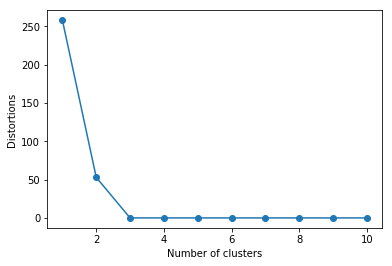

In [21]:
# Checking for best K when number of groups or clusters are not known - Used Elbow Plot. 

import matplotlib.pyplot as plt

distortions = []
for k in range(1,11):
    kmeans = KMeans(
        n_clusters=k, init = "random",
        n_init=10, max_iter=300, random_state=0
    )
    kmeans.fit(principalDfConcat.set_index('patient_id'))
    distortions.append(kmeans.inertia_)
    
#plot
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortions")
plt.show()

As we see in the Elbow plot, we do not get exact elbow shape. However, the first bend is at k=3. We thus, assume 3 clusters would be appropriate count fo the number of clusters.

### Validating Similarity between cluster outcomes and the cancer stages provided in clinical data. 

In [22]:
df_stage_valid = pd.merge(df_stage[['index','tumor_stage']], principalDfConcat[['patient_id','clusters']], right_on='patient_id', left_on='index', how='left') \
    .set_index('patient_id') \
    .drop('index', axis=1)
#ensuring ID uniqueness
df_stage_valid.index = [x + '-' + str(i) for i,x in enumerate(df_stage_valid.index)]
df_stage_valid.head()

,tumor_stage,clusters
tcga-2v-a95s-0-0,stage ii,1
tcga-2y-a9gt-2-1,stage i,2
tcga-2y-a9gu-3-2,stage i,0
tcga-2y-a9gv-4-3,stage i,2
tcga-2y-a9gw-5-4,stage i,0


In [23]:
# Aggregating at clinical cancer stage level to check for similarity in both outcomes.
tmp = df_stage_valid.reset_index().groupby('tumor_stage')['clusters'].value_counts()
display(tmp)
(tmp/df_stage_valid.shape[0]).round(2)

tumor_stage  clusters
stage i      0           114
             1            44
             2            38
stage ii     0            41
             1            38
             2            19
stage iii    1            46
             0            30
             2            21
Name: clusters, dtype: int64

tumor_stage  clusters
stage i      0           0.29
             1           0.11
             2           0.10
stage ii     0           0.10
             1           0.10
             2           0.05
stage iii    1           0.12
             0           0.08
             2           0.05
Name: clusters, dtype: float64

##### As we can see from above results, tumor stage itself is not reflective of gene expression variation. Hence, we need to deep dive and understand which Hallmarks of cancer associate to each of the stages.  